In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [60]:
dfBubbleSort = pd.read_csv("Results16/bubbleSort-PC16.csv")
dfBubbleSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


In [61]:
dfBubbleSort

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms)
0,random1-25000-1,13.232300,11.544128,,0.399902,69,1710.16
1,random1-25000-1,14.163696,12.361511,,0.493103,69,1723.56
2,random1-25000-1,13.530029,11.768127,,0.451172,69,1730.49
3,random1-25000-1,14.085632,12.302307,,0.486084,70,1704.74
4,random1-25000-1,14.142822,12.376465,,0.485718,70,1699.14
...,...,...,...,...,...,...,...
11754,worst-500000-1,815.602600,719.116455,,18.233643,64,107186.00
11755,worst-500000-1,806.500366,709.628906,,19.146301,57,107578.00
11756,worst-500000-1,808.787598,712.215637,,18.715515,63,107361.00
11757,worst-500000-1,810.676819,712.063965,,20.324219,57,108984.00


In [62]:
# l = []
# for i in range(len(dfBubbleSort)):
#     l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[0])

# dfBubbleSort["Input case"] = l

# l = []
# for i in range(len(dfBubbleSort)):
#     l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[1])

# dfBubbleSort["Size"] = l

In [63]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l


makeinputColumn(dfBubbleSort)

def makeSize(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l


makeSize(dfBubbleSort)


# def makeinputColumn_readCSV(df):
#     l = []
#     for i in range(len(df)):
#         l.append(df.iloc[i]["Test name"].split("-")[1].lower())
#     df["Input case"] = l
    
# makeinputColumn_readCSV(readCSV)


In [64]:
dfBubbleSort

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
0,random1-25000-1,13.232300,11.544128,,0.399902,69,1710.16,random1,25000
1,random1-25000-1,14.163696,12.361511,,0.493103,69,1723.56,random1,25000
2,random1-25000-1,13.530029,11.768127,,0.451172,69,1730.49,random1,25000
3,random1-25000-1,14.085632,12.302307,,0.486084,70,1704.74,random1,25000
4,random1-25000-1,14.142822,12.376465,,0.485718,70,1699.14,random1,25000
...,...,...,...,...,...,...,...,...,...
11754,worst-500000-1,815.602600,719.116455,,18.233643,64,107186.00,worst,500000
11755,worst-500000-1,806.500366,709.628906,,19.146301,57,107578.00,worst,500000
11756,worst-500000-1,808.787598,712.215637,,18.715515,63,107361.00,worst,500000
11757,worst-500000-1,810.676819,712.063965,,20.324219,57,108984.00,worst,500000


In [65]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

dfBubbleSort = removeNonsense(dfBubbleSort)
dfBubbleSort

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
0,random1-25000-1,13.232300,11.544128,,0.399902,69,1710.16,random1,25000
1,random1-25000-1,14.163696,12.361511,,0.493103,69,1723.56,random1,25000
2,random1-25000-1,13.530029,11.768127,,0.451172,69,1730.49,random1,25000
3,random1-25000-1,14.085632,12.302307,,0.486084,70,1704.74,random1,25000
4,random1-25000-1,14.142822,12.376465,,0.485718,70,1699.14,random1,25000
...,...,...,...,...,...,...,...,...,...
11754,worst-500000-1,815.602600,719.116455,,18.233643,64,107186.00,worst,500000
11755,worst-500000-1,806.500366,709.628906,,19.146301,57,107578.00,worst,500000
11756,worst-500000-1,808.787598,712.215637,,18.715515,63,107361.00,worst,500000
11757,worst-500000-1,810.676819,712.063965,,20.324219,57,108984.00,worst,500000


In [66]:
from scipy.stats import shapiro

In [67]:
#making the dataframes for each case 
dfBubbleSortBest = dfBubbleSort[dfBubbleSort["Test name"].str.startswith("best")]
dfBubbleSortWorst = dfBubbleSort[dfBubbleSort["Test name"].str.startswith("worst")]
dfBubbleSortRandom = dfBubbleSort[dfBubbleSort["Test name"].str.startswith("random")]


In [68]:
dfBubbleSortWorst

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
3199,worst-25000-1,4.719421,4.119934,,0.222046,63,521.133,worst,25000
3200,worst-25000-1,4.973877,4.351990,,0.229919,63,533.492,worst,25000
3201,worst-25000-1,4.925171,4.320374,,0.224609,63,529.143,worst,25000
3202,worst-25000-1,5.466370,4.827759,,0.247559,63,551.101,worst,25000
3203,worst-25000-1,4.911377,4.288513,,0.229614,63,537.153,worst,25000
...,...,...,...,...,...,...,...,...,...
11754,worst-500000-1,815.602600,719.116455,,18.233643,64,107186.000,worst,500000
11755,worst-500000-1,806.500366,709.628906,,19.146301,57,107578.000,worst,500000
11756,worst-500000-1,808.787598,712.215637,,18.715515,63,107361.000,worst,500000
11757,worst-500000-1,810.676819,712.063965,,20.324219,57,108984.000,worst,500000


In [69]:
dfBubbleSortBest

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
5359,best-25000-1,3.971802,3.439758,,0.211914,67,436.274,best,25000
5360,best-25000-1,3.906067,3.412231,,0.196228,67,387.021,best,25000
5361,best-25000-1,4.729065,4.176880,,0.225342,66,456.073,best,25000
5362,best-25000-1,4.157043,3.656067,,0.199341,66,400.178,best,25000
5363,best-25000-1,4.178345,3.663391,,0.203125,66,400.109,best,25000
...,...,...,...,...,...,...,...,...,...
8554,best-500000-1,431.166931,379.487732,,9.919800,57,57515.400,best,500000
8555,best-500000-1,437.413879,385.345886,,10.358276,63,57861.500,best,500000
8556,best-500000-1,437.612915,385.795898,,10.052307,63,57637.800,best,500000
8557,best-500000-1,437.277649,385.316528,,10.179382,63,57746.100,best,500000


# Shapiro Wilks Test for CPU to Size

## Best

3.414295972684056e-12
stat=0.935, p=0.000
3.8314894047898857e-26
stat=0.699, p=0.000
1.0120759506766223e-31
stat=0.512, p=0.000
1.2403984448834747e-33
stat=0.430, p=0.000
2.3506427490797025e-37
stat=0.239, p=0.000
2.5511307155380646e-27
stat=0.665, p=0.000
1.127368489360625e-12
stat=0.930, p=0.000
9.24326656881469e-11
stat=0.947, p=0.000


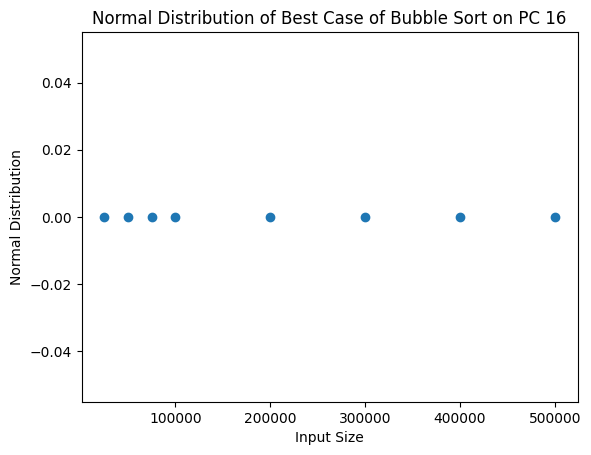

In [103]:
data = []
size = []

for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortBest[dfBubbleSortBest["Size"]==i]["CPU (J)"]).pvalue:
        data.append(1)
    else:
        data.append(0)
    size.append(i)
    print(shapiro(dfBubbleSortBest[dfBubbleSortBest["Size"]==i]["CPU (J)"]).pvalue)
    stat, p = shapiro(dfBubbleSortBest[dfBubbleSortBest["Size"]==i]["CPU (J)"])
    print('stat=%.3f, p=%.3f' % (stat, p))

plt.plot(size,data,"o")
plt.xlabel("Input Size")
plt.ylabel("Normal Distribution")
plt.title("Normal Distribution of Best Case of Bubble Sort on PC 16")
plt.show()

In [99]:
type(dfBubbleSortBest[dfBubbleSortBest["Size"]==i]["CPU (J)"])

pandas.core.series.Series

In [97]:
dfBubbleSortBest["CPU (J)"]

5359      3.439758
5360      3.412231
5361      4.176880
5362      3.656067
5363      3.663391
           ...    
8554    379.487732
8555    385.345886
8556    385.795898
8557    385.316528
8558    385.186523
Name: CPU (J), Length: 3198, dtype: float64

## Worst 

1.1576454898027826e-24
stat=0.877, p=0.000
1.8243226459527854e-18
stat=0.933, p=0.000
0.3023633062839508
stat=0.998, p=0.302
1.6354722902178764e-05
stat=0.989, p=0.000
0.009759914129972458
stat=0.995, p=0.010
8.35624375684213e-13
stat=0.950, p=0.000
0.0015413692453876138
stat=0.987, p=0.002
0.03994414955377579
stat=0.992, p=0.040


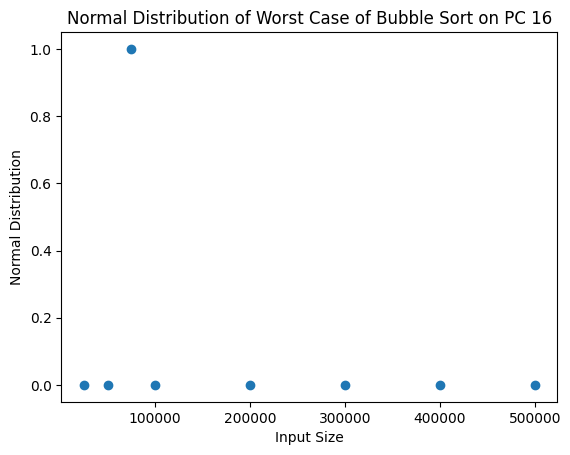

In [104]:
data2 = []
size2 = []

for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortWorst[dfBubbleSortWorst["Size"]==i]["CPU (J)"]).pvalue:
        data2.append(1)
    else:
        data2.append(0)
    size2.append(i)
    print(shapiro(dfBubbleSortWorst[dfBubbleSortWorst["Size"]==i]["CPU (J)"]).pvalue)
    stat, p = shapiro(dfBubbleSortWorst[dfBubbleSortWorst["Size"]==i]["CPU (J)"])
    print('stat=%.3f, p=%.3f' % (stat, p))

plt.plot(size2,data2,"o")
plt.xlabel("Input Size")
plt.ylabel("Normal Distribution")
plt.title("Normal Distribution of Worst Case of Bubble Sort on PC 16")
plt.show()

## Random 

4.1480791423964547e-07
stat=0.970, p=0.000


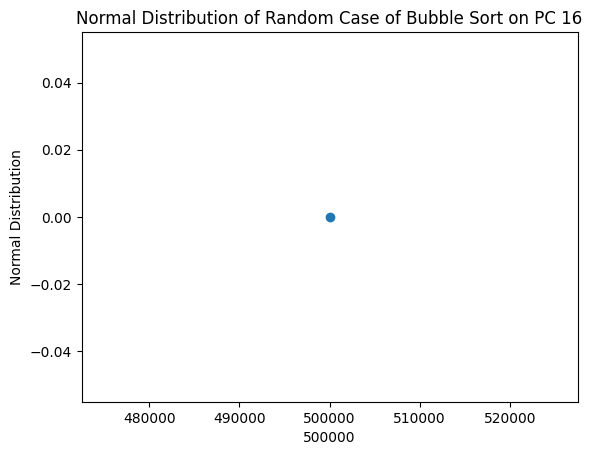

In [73]:
data3 = []
size3 = []

for i in [500000]:
    if 0.05 < shapiro(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["CPU (J)"]).pvalue:
        data3.append(1)
    else:
        data3.append(0)
    size3.append(500000)

print(shapiro(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["CPU (J)"]).pvalue)
stat, p = shapiro(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["CPU (J)"])
print('stat=%.3f, p=%.3f' % (stat, p))

plt.plot(size3,data3,"o")
plt.xlabel("500000")
plt.ylabel("Normal Distribution")
plt.title("Normal Distribution of Random Case of Bubble Sort on PC 16")
plt.show()

# Shapiro Wilks Test for Time to Size 

## Best 

1.7232804339073482e-06
stat=0.974, p=0.000


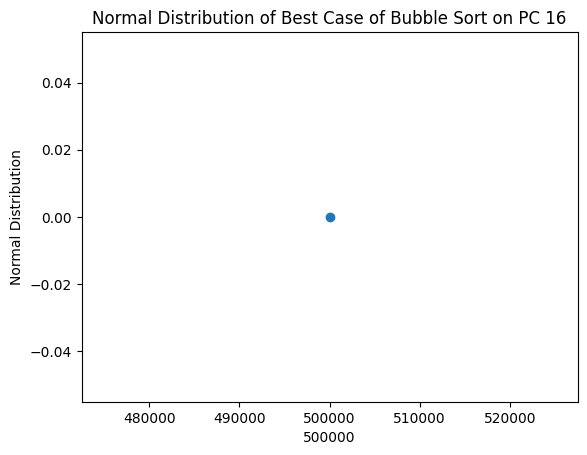

In [74]:
data4 = []
size4 = []

for i in [500000]:
    if 0.05 < shapiro(dfBubbleSortBest[dfBubbleSortBest["Size"]==500000]["Time (ms)"]).pvalue:
        data4.append(1)
    else:
        data4.append(0)
    size4.append(500000)

print(shapiro(dfBubbleSortBest[dfBubbleSortBest["Size"]==500000]["Time (ms)"]).pvalue)
stat, p = shapiro(dfBubbleSortBest[dfBubbleSortBest["Size"]==500000]["Time (ms)"])
print('stat=%.3f, p=%.3f' % (stat, p))

plt.plot(size4,data4,"o")
plt.xlabel("500000")
plt.ylabel("Normal Distribution")
plt.title("Normal Distribution of Best Case of Bubble Sort on PC 16")
plt.show()

## Worst

1.7276958241042043e-26
stat=0.688, p=0.000


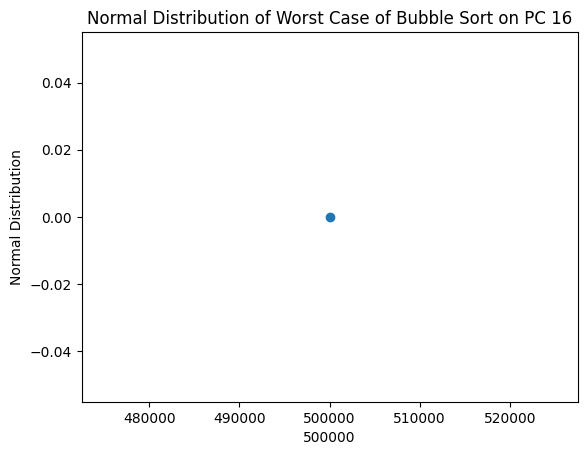

In [75]:
data5 = []
size5 = []

for i in [500000]:
    if 0.05 < shapiro(dfBubbleSortWorst[dfBubbleSortWorst["Size"]==500000]["Time (ms)"]).pvalue:
        data5.append(1)
    else:
        data5.append(0)
    size5.append(500000)

print(shapiro(dfBubbleSortWorst[dfBubbleSortWorst["Size"]==500000]["Time (ms)"]).pvalue)
stat, p = shapiro(dfBubbleSortWorst[dfBubbleSortWorst["Size"]==500000]["Time (ms)"])
print('stat=%.3f, p=%.3f' % (stat, p))

plt.plot(size5,data5,"o")
plt.xlabel("500000")
plt.ylabel("Normal Distribution")
plt.title("Normal Distribution of Worst Case of Bubble Sort on PC 16")
plt.show()

## Random 

6.684049731120467e-05
stat=0.981, p=0.000


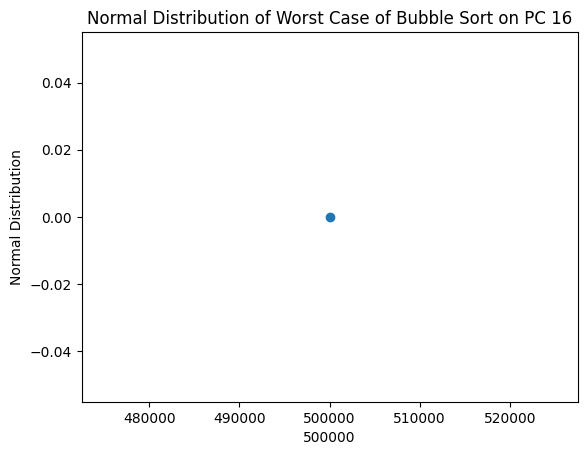

In [76]:
data6 = []
size6 = []

for i in [500000]:
    if 0.05 < shapiro(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["Time (ms)"]).pvalue:
        data6.append(1)
    else:
        data6.append(0)
    size6.append(500000)

print(shapiro(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["Time (ms)"]).pvalue)
stat, p = shapiro(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["Time (ms)"])
print('stat=%.3f, p=%.3f' % (stat, p))

plt.plot(size6,data6,"o")
plt.xlabel("500000")
plt.ylabel("Normal Distribution")
plt.title("Normal Distribution of Worst Case of Bubble Sort on PC 16")
plt.show()

# QQ Plots to Find the Normal Distribution

In [77]:
import numpy as np
import statsmodels.api as sm
import pylab

### Nomarl Distribution of Time to Input Size 

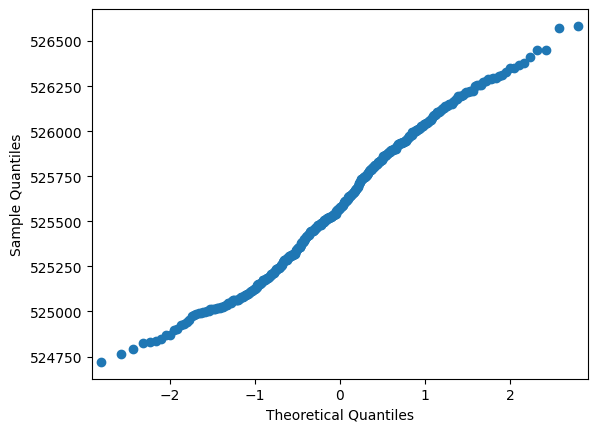

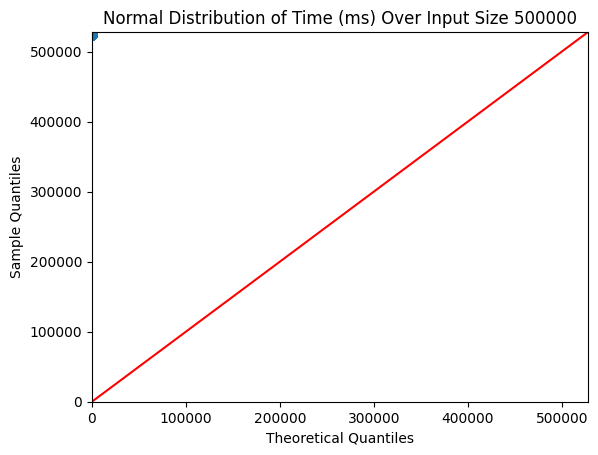

In [93]:
a = np.random.normal(525597, 405, 500000) # (mean, std, size) from website: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html calculated below but not sure if it is completely correct
sm.qqplot(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["Time (ms)"])
sm.qqplot(a, line='45')
plt.title("Normal Distribution of Time (ms) Over Input Size 500000")
plt.show()

#### Finding Mean 

In [79]:
(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["Time (ms)"]).mean()

525597.0231362468

In [80]:
import numpy as np

#### Finding Stand Deviation

In [81]:
std = []
std.append(list(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["Time (ms)"]))
np.std(std)

405.8513879231042

### Random Case CPU (J) Over Input Size 500000

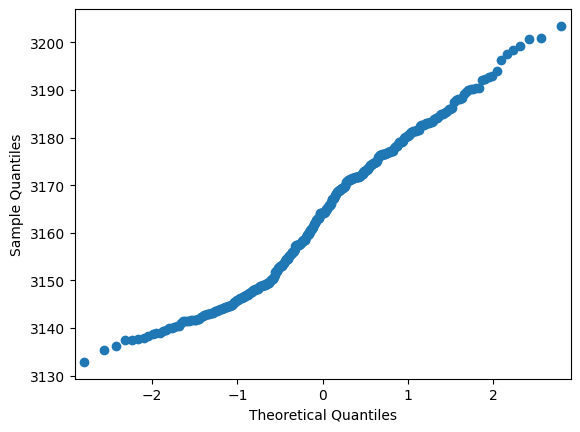

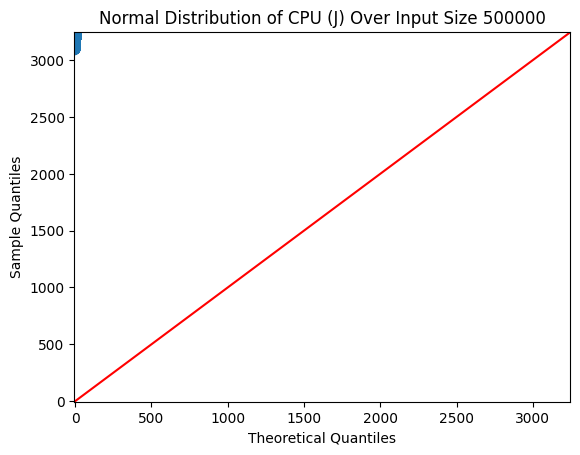

In [94]:
a = np.random.normal(3164, 15.5, 500000) # (mean, std, size) from website: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 
#calculated below but not sure if it is completely correct
sm.qqplot(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["CPU (J)"])
sm.qqplot(a, line='45')
plt.title("Normal Distribution of CPU (J) Over Input Size 500000")
plt.show()

In [83]:
(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["CPU (J)"]).mean()

3163.665416099725

In [85]:
std2 = []
std2.append(list(dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["CPU (J)"]))
np.std(std2)

15.511856608388984

In [ ]:
print((dfBubbleSortRandom[dfBubbleSortRandom["Size"]==500000]["CPU (J)"].to_string()))

2799      3174.635742
2800      3140.147644
2801      3142.386475
2802      3179.026001
2803      3188.106506
2804      3146.768005
2805      3159.723694
2806      3169.071594
2807      3167.036011
2808      3178.264893
2809      3182.695435
2810      3162.830261
2811      3157.437134
2812      3189.248657
2813      3181.677490
2814      3146.873169
2815      3150.026062
2816      3148.788574
2817      3157.349487
2818      3153.103455
2819      3190.276550
2820      3164.379150
2821      3158.299316
2822      3182.641907
2823      3162.072205
2824      3164.078003
2825      3184.969971
2826      3153.709961
2827      3179.971680
2828      3150.145691
2829      3147.925781
2830      3179.075989
2831      3144.392639
2832      3162.602661
2833      3146.910522
2834      3188.382507
2835      3172.212952
2836   -258999.478455
2837      3148.098999
2838      3154.129333
2839      3176.499084
2840      3141.458069
2841      3180.362671
2842      3145.378174
2843      3199.237366
2844      

### Best Case CPU (J) Over Input SIze 500000

#### Finding the Mean

In [87]:
(dfBubbleSortBest[dfBubbleSortBest["Size"]==500000]["CPU (J)"]).mean()

383.6928221130371

#### Finding the Standard Deviation 

In [88]:
std3 = []
std3.append(list(dfBubbleSortBest[dfBubbleSortBest["Size"]==500000]["CPU (J)"]))
np.std(std3)

2.673950293157867

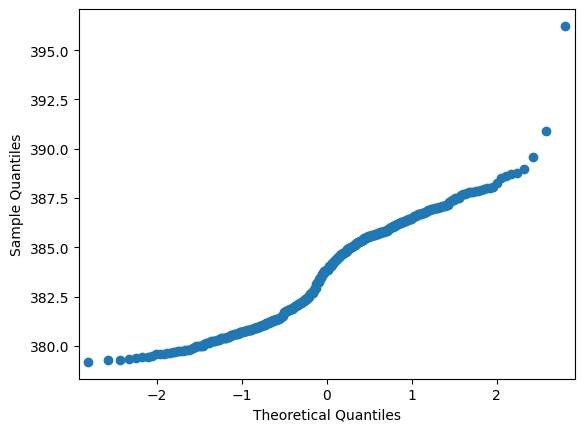

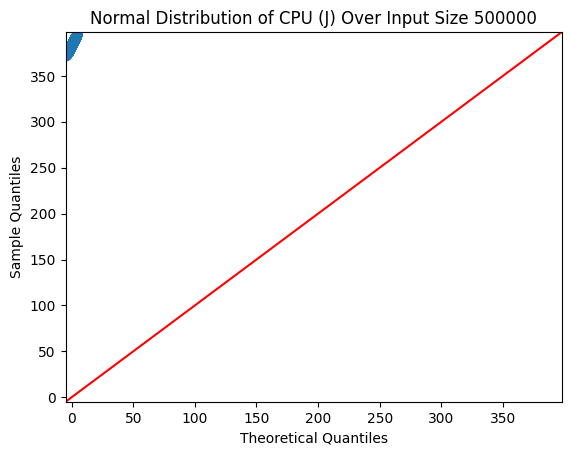

In [92]:
a = np.random.normal(384, 2.67, 500000) # (mean, std, size) from website: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 
#calculated below but not sure if it is completely correct
sm.qqplot(dfBubbleSortBest[dfBubbleSortBest["Size"]==500000]["CPU (J)"])
sm.qqplot(a, line='45')
plt.title("Normal Distribution of CPU (J) Over Input Size 500000")
plt.show()